In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no missing values in dataset

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

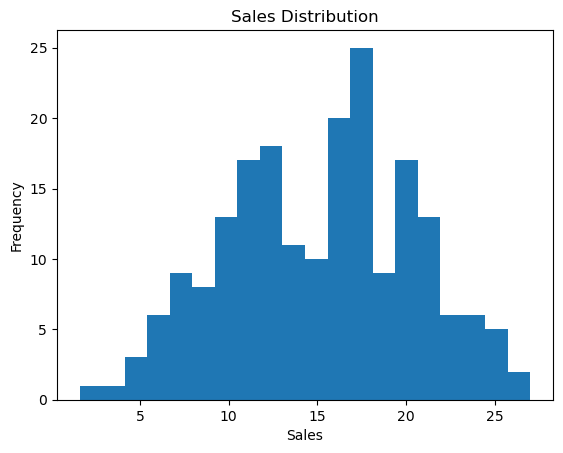

In [9]:
#Histogram

# Create a histogram
plt.hist(df['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

the most frequent maximum times of sales  occurs between 15 to 20

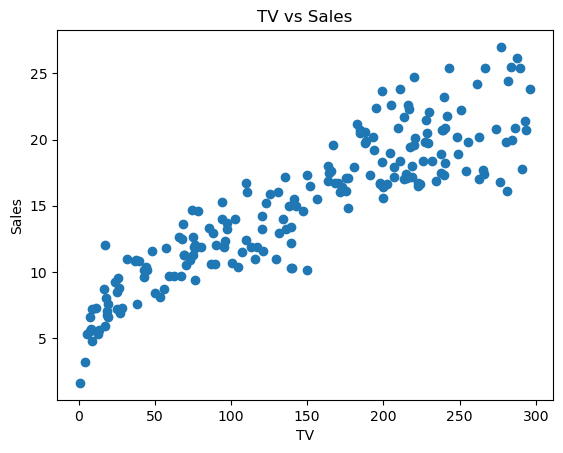

In [11]:
#Scatter plot
# Create a scatter plot
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

The scatter plot indicates tv is directly propertional to sales.If tv advertersing is increases and the sales also increases

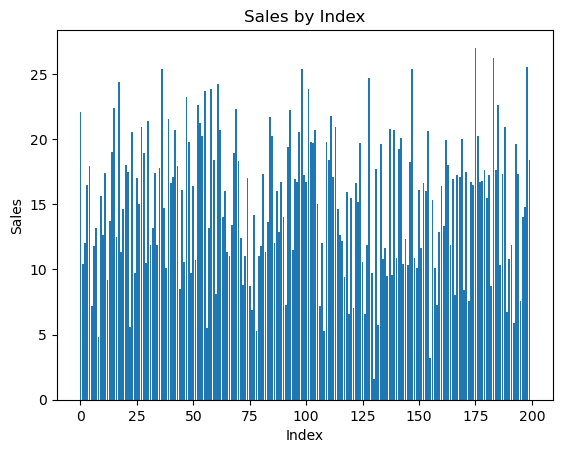

In [12]:
#bar plot
plt.bar(df.index, df['Sales'])
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales by Index')
plt.show()

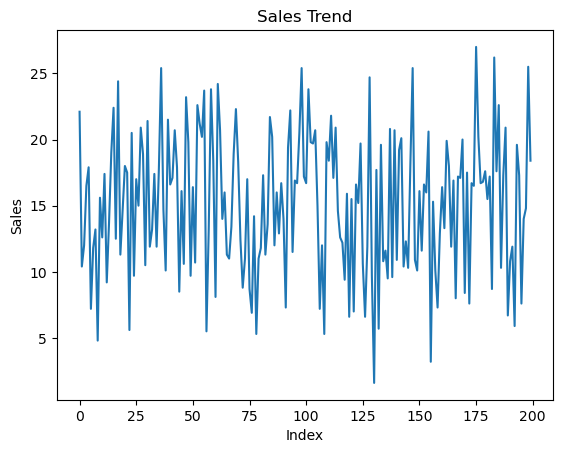

In [13]:
#line plot
plt.plot(df.index, df['Sales'])
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales Trend')
plt.show()

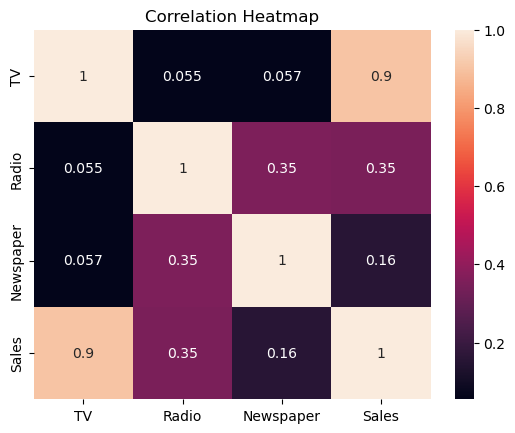

In [14]:
#correlation plot
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


there is strong positive correlation between tv and sales.For Radio and Newspaper has low correlation.So there is max chance of sales by advertising through TV.

# Split the data

In [31]:
x=df.drop(columns='Sales',axis=1)
y=df['Sales']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
lin_r2 = r2_score(y_test, y_pred_lin)
print('Linear Regression R-squared:', lin_r2)

Linear Regression R-squared: 0.8655979373420272


In [36]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
dt_r2 = r2_score(y_test, y_pred_dt)
print('Decision Tree Regression R-squared:', dt_r2)


Decision Tree Regression R-squared: 0.8561100134248035


In [37]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print('Random Forest Regression R-squared:', rf_r2)

Random Forest Regression R-squared: 0.9351212660981862


In [39]:
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print('XGBoost Regression R-squared:', xgb_r2)

XGBoost Regression R-squared: 0.9441723900012424


# Evaluation Metrics

In [40]:
# Evaluation metrics for Linear Regression
lin_mse = mean_squared_error(y_test, y_pred_lin)
print('Linear Regression MSE:', lin_mse)


# Evaluation metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree Regression MSE:', dt_mse)


# Evaluation metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Regression MSE:', rf_mse)

# Evaluation metrics for XGBoost Regression
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
print('XGBoost Regression MSE:', xgb_mse)



Linear Regression MSE: 2.6360765623280664
Decision Tree Regression MSE: 2.822166666666666
Random Forest Regression MSE: 1.272490216666665
XGBoost Regression MSE: 1.0949672299526045


# Conclusion

In [ ]:
There is no missing values in the dataset.
1.the most frequent maximum times of sales occurs between 15 to 20
2.The scatter plot indicates tv is directly propertional to sales.If tv advertersing is increases and the sales also increases
3.there is strong positive correlation between tv and sales.For Radio and Newspaper has low correlation.So there is max chance of sales by advertising through TV.
4.XG boost regressor performs well with 94% of accuracy
5.Evaluation metrics for XGBoost is MSE: 1.0949672299526045